In [44]:
import mlflow
import torch
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
batch_size=4
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],std = [ 1., 1., 1. ]), 
                                transforms.ToPILImage() ])
validation_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [58]:
mlflow.set_tracking_uri('http://ec2-18-206-205-77.compute-1.amazonaws.com')

In [59]:
model_uri = "runs:/2cf6b5fd6f1a4d3c97d307fbceeefab5/cifar10-classifier"
loaded_model = mlflow.pytorch.load_model(model_uri)

frog


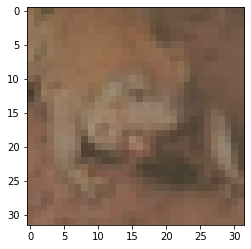

In [66]:
test_data, label = validation_set[5]
invTrans(test_data)
print(classes[label])
plt.imshow(invTrans(test_data))

In [67]:
predict=loaded_model(test_data.reshape(-1,3,32,32))
predicted_index = torch.argmax(predict)
predicted_index, classes[predicted_index]

(tensor(6), 'frog')

In [71]:
loaded_model.eval()

MyCNNModel(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)